In [1]:
#2021.06.29. TUE
#Hankyeong

#00. 패키지 호출 
import numpy as np
import pandas as pd 
import warnings
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

#00-1. 씨드넘버 정의하기. 
np.random.seed(2021)
tf.random.set_seed(2021)

#00-2. 시각화 옵션 설정하기. 
%matplotlib inline

#00-3. warning message ignore
warnings.filterwarnings(action='ignore')

In [2]:
#03. wine 데이터셋으로 다항분류하기. 
#(1) 데이터셋 불러오기. 
wine_raw = pd.read_csv('../../data/wine_2.csv', header=None)

#(2) 원본 데이터셋 보관하기. 
wine = wine_raw
wine

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [3]:
#(3) 컬럼 순서 재배치하기. 
wine = wine[[1,2,3,4,5,6,7,8,9,10,12,11]]
wine.rename(columns={12: '11', 11:'target'},inplace=True)
wine

,1,2,3,4,5,6,7,8,9,10,11,target
0,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,5
1,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,5
2,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,5
3,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,6
4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,6
6493,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,5
6494,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,6
6495,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0,7


In [4]:
#(3) target 변수 분포 확인하기. 
wine['target'].value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: target, dtype: int64

In [5]:
#(4) target 변수의 3, 9인 값 결측값 처리후 제거하기. 
wine['target'][wine['target'] == 3] = np.nan
wine['target'][wine['target'] == 9] = np.nan
wine = wine.dropna()
wine

,1,2,3,4,5,6,7,8,9,10,11,target
0,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,5.0
1,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,5.0
2,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,5.0
3,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,6.0
4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,6.0
6493,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,5.0
6494,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,6.0
6495,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0,7.0


In [6]:
#PLUS. 삭제되었는지 확인하기. 
wine['target'].value_counts().sort_index()

4.0     216
5.0    2138
6.0    2836
7.0    1079
8.0     193
Name: target, dtype: int64

In [7]:
#(5) feature 변수 스케일링 처리하기. 
mm_scaler = MinMaxScaler()
X_scaled = mm_scaler.fit_transform(wine.iloc[:,:-1].values)

#(6) target 변수 원핫 인코딩 처리하기. 
y_le = LabelEncoder().fit_transform(wine['target'])
y_le = y_le.reshape(-1,1)
Y_ohe = OneHotEncoder().fit_transform(y_le)
Y_ohe = Y_ohe.toarray()

#(6) train, test 데이터셋으로 나누기. 
X_train, X_test, Y_train, Y_test = train_test_split(
X_scaled, Y_ohe, stratify=wine['target'], random_state=2021
)

#(7) train, test 데이터셋 차원 확인하기.  
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((4846, 11), (4846, 5), (1616, 11), (1616, 5))

In [8]:
#(8) 모델 정의하기. 
model = Sequential([
    Dense(units=48, input_dim=11, activation='relu'),
    Dense(units=36, activation='relu'),
    Dense(units=24, activation='relu'),
    Dense(units=5, activation='softmax')
])

#(9) 모델 요약정보 확인하기. 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 36)                1764      
_________________________________________________________________
dense_2 (Dense)              (None, 24)                888       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 125       
Total params: 3,353
Trainable params: 3,353
Non-trainable params: 0
_________________________________________________________________


In [9]:
#(10) 모델 환경(compile) 설정하기. 
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics='accuracy'
)

#(11)모델 저장 경로 지정하기. 
model_path = '../../model/wine2_best_model.h5' 

#(12) checkpointer 객체 할당하기. 
checkpointer = ModelCheckpoint(
    model_path, 
    monitor='val_loss', 
    save_best_only=True,
    verbose=1, 
)

#(13) earlystopping 객체 할당하기. 
early_stopping = EarlyStopping(patience=250)

#(14) 모델 학습하기. 
model_fit = model.fit(
    X_train,Y_train,
    validation_split=0.2,
    epochs=3000, 
    batch_size=250, 
    verbose=0, 
    callbacks=[checkpointer, early_stopping]
)

d not improve from 0.99641

Epoch 00141: val_loss did not improve from 0.99641

Epoch 00142: val_loss did not improve from 0.99641

Epoch 00143: val_loss did not improve from 0.99641

Epoch 00144: val_loss did not improve from 0.99641

Epoch 00145: val_loss did not improve from 0.99641

Epoch 00146: val_loss did not improve from 0.99641

Epoch 00147: val_loss did not improve from 0.99641

Epoch 00148: val_loss did not improve from 0.99641

Epoch 00149: val_loss did not improve from 0.99641

Epoch 00150: val_loss did not improve from 0.99641

Epoch 00151: val_loss did not improve from 0.99641

Epoch 00152: val_loss did not improve from 0.99641

Epoch 00153: val_loss did not improve from 0.99641

Epoch 00154: val_loss did not improve from 0.99641

Epoch 00155: val_loss did not improve from 0.99641

Epoch 00156: val_loss did not improve from 0.99641

Epoch 00157: val_loss did not improve from 0.99641

Epoch 00158: val_loss did not improve from 0.99641

Epoch 00159: val_loss did not improv

In [10]:
#(15) best 모델 할당하기. 
best_model = load_model(model_path)

#(16) 모델 예측 및 평가하기. 
accuracy_score = best_model.evaluate(X_test, Y_test)
accuracy_score

51/51 [==============================] - 0s 372us/step - loss: 1.0029 - accuracy: 0.5761


[1.0029044151306152, 0.5761138796806335]

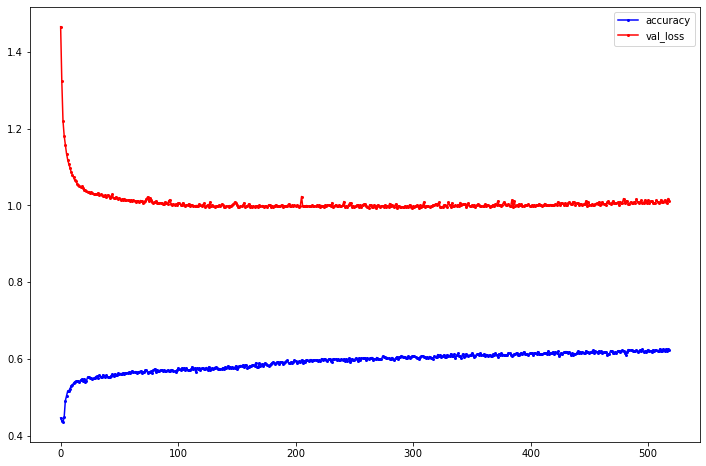

In [11]:
#(17) 훈련과정 시각화하기. 
y_acc = model_fit.history['accuracy']
y_vloss = model_fit.history['val_loss']
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()